In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")
sub = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
sub.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


**EDA**

In [6]:
EDA_tr = train.copy()

In [7]:
EDA_tr.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
EDA_tr["date"] = EDA_tr.datetime.apply(lambda x : x.split()[0])
EDA_tr["hour"] = EDA_tr.datetime.apply(lambda x : x.split()[1].split(":")[0])
EDA_tr["weekday"] = EDA_tr.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
EDA_tr["month"] = EDA_tr.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
EDA_tr["season"] = EDA_tr.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
EDA_tr["weather"] = EDA_tr.weather.map({1: "Clear", 2 : "Mist", 3 : "Light Snow", 4 :"Heavy Rain" })
tEDA_tr  = EDA_tr.drop(["datetime"],axis=1)

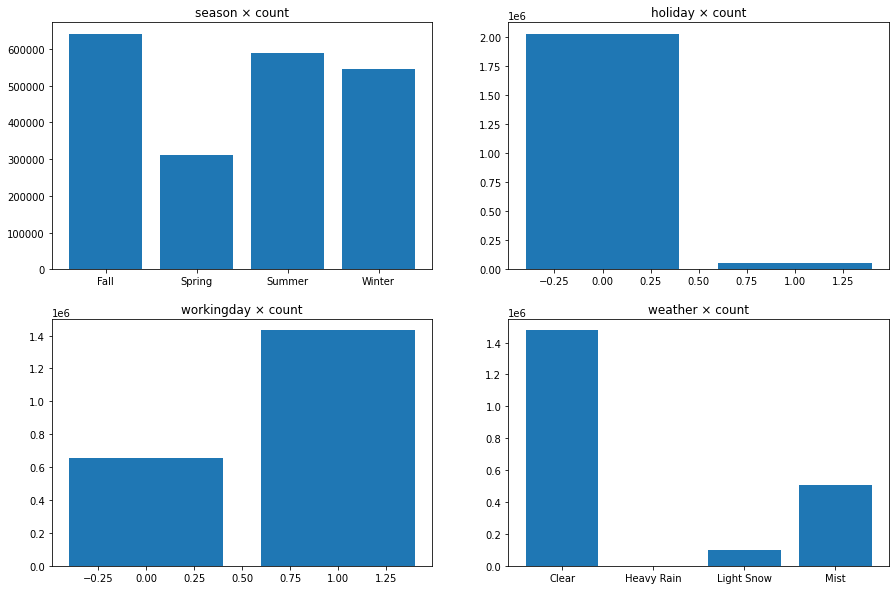

In [9]:
labels = ["season","holiday","workingday","weather"]
f,ax =  plt.subplots(2,2,figsize=(15,10))

for n,label in enumerate(labels):
    x = EDA_tr.groupby(label)["count"].sum().reset_index()[label]
    y = tEDA_tr.groupby(label)["count"].sum().reset_index()["count"]
    ax[n//2,n%2].bar(x,y)
    ax[n//2,n%2].set_title("{} × count".format(label))

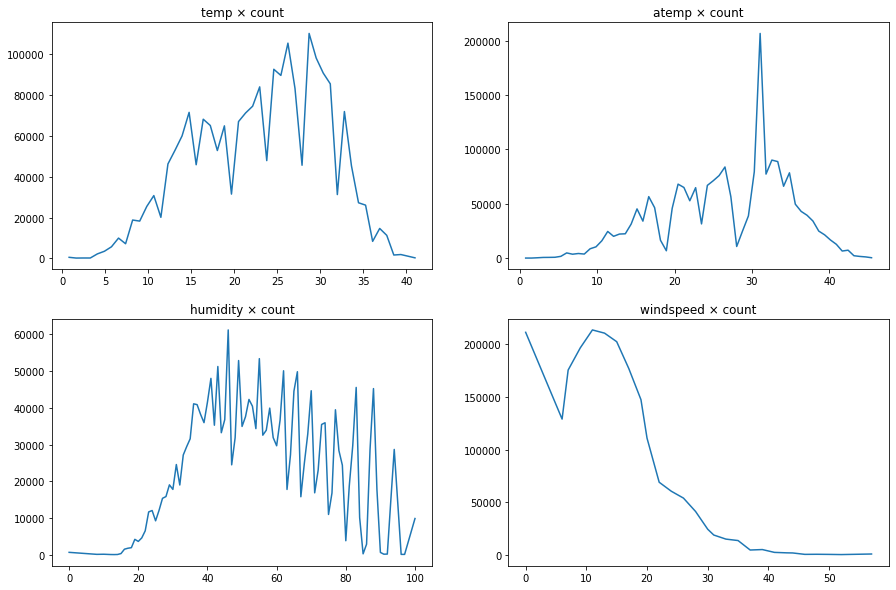

In [10]:
labels = ["temp","atemp","humidity","windspeed"]
f,ax =  plt.subplots(2,2,figsize=(15,10))

for n,label in enumerate(labels):
    x = EDA_tr.groupby(label)["count"].sum().reset_index()[label]
    y = EDA_tr.groupby(label)["count"].sum().reset_index()["count"]
    ax[n//2,n%2].plot(x,y)
    ax[n//2,n%2].set_title("{} × count".format(label))

<AxesSubplot:>

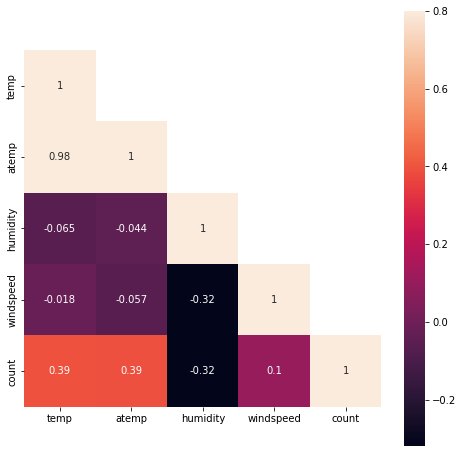

In [11]:
corrMatt = EDA_tr[["temp","atemp","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

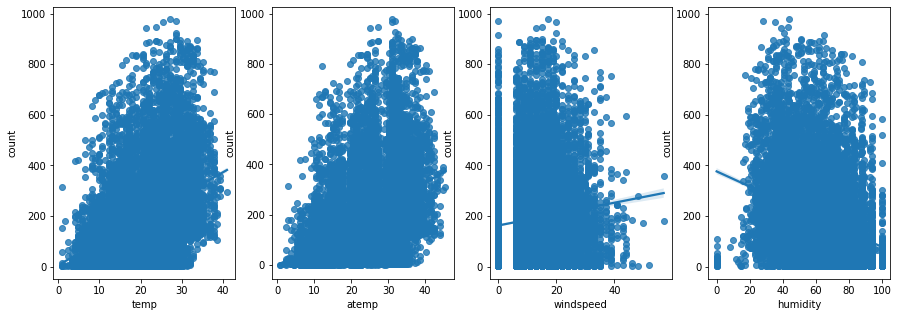

In [12]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(15, 5)
sns.regplot(x="temp", y="count", data=EDA_tr,ax=ax1)
sns.regplot(x="atemp", y="count", data=EDA_tr,ax=ax2)
sns.regplot(x="windspeed", y="count", data=EDA_tr,ax=ax3)
sns.regplot(x="humidity", y="count", data=EDA_tr,ax=ax4)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

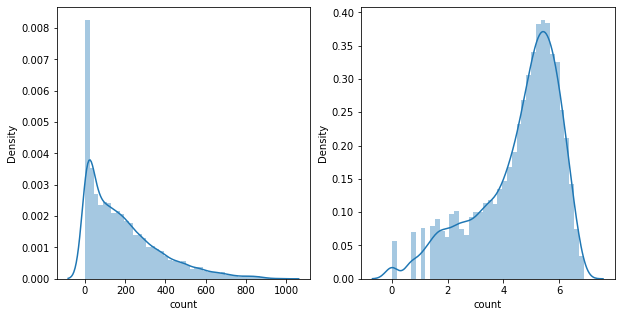

In [13]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 5)
sns.distplot(EDA_tr["count"],ax=ax1)
sns.distplot(np.log(EDA_tr["count"]),ax=ax2)

**Feature engineering**